# Fatigue Analysis

In [5]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
pd.set_option('display.max_columns',None)
data = pd.read_csv("Sleep_Data_Sampled.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [7]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,44.130667,6.997327,7.131267,59.925000,5.654800,70.857533,6795.080000
std,4330.271354,6.840091,0.615187,1.053111,16.814374,1.393568,3.614836,1329.706484
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,3750.750000,40.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,7500.500000,44.000000,7.000000,7.000000,60.000000,6.000000,70.000000,6500.000000
75%,11250.250000,48.000000,7.450000,8.000000,75.000000,6.000000,72.000000,7600.000000
max,15000.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
print(data['Occupation'].unique())
print(data['BMI Category'].unique())
print(data['Blood Pressure'].unique())
print(data['Sleep Disorder'].unique())

['Doctor' 'Teacher' 'Software Engineer' 'Lawyer' 'Engineer' 'Accountant'
 'Nurse' 'Scientist' 'Manager' 'Salesperson' 'Sales Representative']
['Normal Weight' 'Normal' 'Overweight' 'Obese']
['120/80' '135/90' '126/83' '125/80' '130/85' '140/95' '115/75' '122/80'
 '118/76' '128/85' '128/84' '119/77' '125/82' '118/75' '115/78' '121/79'
 '117/76' '140/90' '135/88' '129/84' '130/86' '139/91' '132/87' '131/86'
 '142/92']
['Healthy' 'Sleep Apnea' 'Insomnia']


In [9]:
# Change BMI Category 'Normal Weight' to 'Normal'

data.replace("Normal Weight", "Normal", inplace=True)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


## Recognizing Variables in the Dataset

There are thirteen variables/columns:

1. Person ID: An identifier for each individual.
2. Sex: The sex of the person (Male/Female).
3. Age: The age of the person in years.
4. Occupation: The occupation or profession of the person.
5. Sleep Duration (hours): The number of hours the person sleeps per day.
6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (Healthy, Insomnia, Sleep Apnea).

Details about Sleep Disorder Column:

15. Healthy: The individual does not exhibit any specific sleep disorder.
16. Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
17. Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

In [1]:
# data = pd.get_dummies(data, prefix=["gen","occ", "bmi", "blood", "sleep"],columns=["Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder"], dtype=int)
# data.head()
!pip install kmodes

  Using cached kmodes-0.12.2-py2.py3-none-any.whl.metadata (8.1 kB)
Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)


In [10]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes

In [11]:
def column_index(df, query_cols):
  '''
  returns the indices of the query_cols
  '''
  cols = df.columns.values
  sidx = np.argsort(cols)
  return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [12]:
data_target = data.copy()
data_target = data_target.drop('Person ID', axis=1)

data_target.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [13]:
cat_cols = data_target.select_dtypes(include='object')
categorical_indices = column_index(data_target, cat_cols.columns)
categorical = list(categorical_indices)

In [22]:
cost = []
for cluster in range(1,10):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_jobs=-1,n_init=10,verbose=1)
    clusters = kproto.fit_predict(data_target, categorical=categorical)
    print('Cost : {cost}'.format(cost=kproto.cost_))
    cost.append(kproto.cost_)

1\.cluster start
Best run was number 1
Cost : 26529502043.795006
2\.cluster start
Best run was number 3
Cost : 8382456394.444837
3\.cluster start
Best run was number 1
Cost : 4687778465.724184
4\.cluster start
Best run was number 6
Cost : 2906236059.627307
5\.cluster start
Best run was number 8
Cost : 2031543743.1184087
6\.cluster start
Best run was number 10
Cost : 981204206.9009
7\.cluster start
Best run was number 8
Cost : 707813401.3455195
8\.cluster start
Best run was number 7
Cost : 556365635.8634623
9\.cluster start
Best run was number 8
Cost : 338422847.7924219


In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

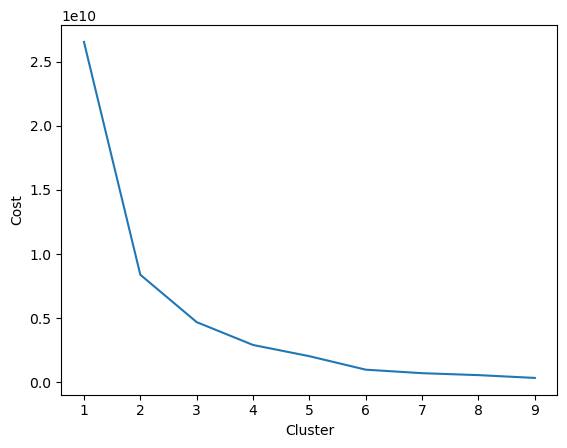

In [24]:
plt.plot(range(1,10),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

In [26]:
kproto = KPrototypes(n_clusters = 3, init='Huang',n_jobs=-1,n_init=10,verbose=1)
kproto.fit(data_target, categorical=categorical)
#centroids  -> clusters, features
centroids = kproto.cluster_centroids_
labels  = kproto.labels_

Best run was number 1


In [27]:
data['Labels'] = labels
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
0,1,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy,1
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy,1
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy,2
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy,1
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy,1


In [33]:
cluster1 = data[data['Labels']==0]
cluster2 = data[data['Labels']==1]
cluster3 = data[data['Labels']==2]

In [34]:
cluster1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
17,18,Male,34,Doctor,7.55,8,68,6,Normal,120/80,69,8000,Healthy,0
18,19,Male,35,Lawyer,7.00,7,75,6,Normal,130/85,72,9000,Healthy,0
22,23,Male,30,Doctor,7.80,7,75,6,Normal,120/80,70,8000,Healthy,0
24,25,Male,30,Doctor,7.80,7,75,6,Normal,120/80,70,8000,Healthy,0
25,26,Female,44,Nurse,6.65,7,75,6,Normal,140/95,72,8500,Healthy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,14930,Female,51,Nurse,6.00,6,90,8,Overweight,140/95,75,10000,Sleep Apnea,0
14930,14931,Female,51,Nurse,6.10,6,90,8,Overweight,140/95,75,10000,Sleep Apnea,0
14931,14932,Female,51,Nurse,6.10,6,90,8,Overweight,140/95,75,10000,Sleep Apnea,0
14967,14968,Female,56,Doctor,8.20,9,90,3,Normal,118/75,65,10000,Healthy,0


In [35]:
cluster2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
0,1,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy,1
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy,1
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy,1
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy,1
5,6,Male,33,Doctor,6.90,7,50,6,Normal,120/80,69,7500,Healthy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,1


In [36]:
cluster3

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy,2
6,7,Male,44,Engineer,7.85,8,45,4,Normal,125/80,65,5000,Healthy,2
11,12,Female,44,Engineer,7.80,8,45,4,Normal,125/80,66,6000,Healthy,2
15,16,Male,46,Doctor,7.10,8,52,6,Normal,140/95,70,6000,Healthy,2
19,20,Male,48,Engineer,8.00,8,52,4,Normal,122/80,66,5900,Healthy,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,14963,Female,54,Engineer,8.40,9,30,3,Normal,125/80,65,5000,Healthy,2
14963,14964,Female,54,Engineer,8.40,9,30,3,Normal,125/80,65,5000,Healthy,2
14964,14965,Female,54,Engineer,8.50,9,30,3,Normal,125/80,65,5000,Healthy,2
14965,14966,Female,55,Nurse,8.10,9,75,4,Overweight,140/95,72,5000,Sleep Apnea,2


In [37]:
data[["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", 'Labels']].groupby('Labels').agg(['min','max','median' ,'mean']).T

Labels                                     0            1            2
Age                     min        28.000000    30.000000    27.000000
                        max        58.000000    59.000000    57.000000
                        median     50.000000    42.000000    44.000000
                        mean       46.601006    43.262302    43.426264
Sleep Duration          min         5.900000     5.850000     5.800000
                        max         8.200000     8.350000     8.500000
                        median      7.050000     7.250000     6.550000
                        mean        6.936756     7.305127     6.802598
Quality of Sleep        min         6.000000     5.000000     4.000000
                        max         9.000000     9.000000     9.000000
                        median      8.000000     8.000000     6.000000
                        mean        7.322157     7.608194     6.674284
Physical Activity Level min        30.000000    30.000000    30.000000
                        max        90.000000    88.000000    88.000000
                        median     82.000000    65.000000    45.000000
                        mean       79.606035    63.899526    46.253047
Stress Level            min         3.000000     3.000000     3.000000
                        max         8.000000     8.000000     8.000000
                        median      6.000000     4.000000     6.000000
                        mean        6.354009     5.020589     5.742840
Heart Rate              min        65.000000    65.000000    65.000000
                        max        75.000000    80.000000    86.000000
                        median     72.000000    69.000000    71.000000
                        mean       71.854987    70.227507    70.779860
Daily Steps             min      8000.000000  6400.000000  3000.000000
                        max     10000.000000  7750.000000  6300.000000
                        median   8500.000000  7000.000000  6000.000000
                        mean     8676.725342  6989.509986  5625.251371

In [38]:
data[["Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder", "Labels"]].groupby('Labels').describe(include='object').T

Labels                           0        1           2
Gender         count          3579     4857        6564
               unique            2        2           2
               top          Female   Female      Female
               freq           2373     2684        3512
Occupation     count          3579     4857        6564
               unique            8       11          11
               top           Nurse    Nurse     Teacher
               freq           2274     1374        1820
BMI Category   count          3579     4857        6564
               unique            2        3           3
               top      Overweight   Normal  Overweight
               freq           2340     2862        4576
Blood Pressure count          3579     4857        6564
               unique           11       23          24
               top          140/95   140/95      130/85
               freq           2269     1289        2297
Sleep Disorder count          3579     4857        6564
               unique            3        3           3
               top     Sleep Apnea  Healthy    Insomnia
               freq           2325     2612        4325

0 - 3 (Level Fatigue, Higher is less fatigue)

## Machine Learning

In [57]:
feature = data.copy()
target = feature['Labels']
feature = feature.drop(['Person ID','Labels'], axis=1)
feature.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy
1,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [58]:
target

0        1
1        1
2        2
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: Labels, Length: 15000, dtype: uint16

In [59]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(feature)
categorical_columns = categorical_columns_selector(feature)

In [60]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [61]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Occupation',
                                                   'BMI Category',
                                                   'Blood Pressure',
                                                   'Sleep Disorder']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'Sleep Duration',
                                                   'Quality of Sleep',
                                                   'Physical Activity Level',
                                                   'Stress Level', 'Heart Rate',
                                                   'Daily Steps'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
data_train, data_test, target_train, target_test = train_test_split(
    feature, target, random_state=42, test_size=0.2
)

In [65]:
_ = model.fit(data_train, target_train)

In [66]:
data_test

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
11499,Female,44,Teacher,6.55,6,45,6,Overweight,135/90,68,6000,Insomnia
6475,Female,32,Scientist,6.75,6,54,7,Normal,131/86,76,6600,Sleep Apnea
13167,Female,48,Teacher,7.40,8,38,4,Normal,135/90,65,5500,Insomnia
862,Male,35,Lawyer,6.65,7,45,6,Normal,130/85,70,6500,Healthy
5970,Female,44,Nurse,6.75,6,75,6,Obese,140/95,80,6650,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
6216,Female,54,Nurse,7.05,8,82,6,Overweight,140/95,72,8500,Sleep Apnea
3585,Male,38,Engineer,7.60,8,75,4,Normal,130/85,66,6500,Healthy
10023,Male,44,Teacher,6.40,6,45,6,Overweight,130/85,68,6000,Insomnia
14044,Female,48,Engineer,7.40,8,38,5,Overweight,125/80,68,5500,Insomnia


In [67]:
model.predict(data_test)

array([2, 1, 2, ..., 2, 2, 2], dtype=uint16)

In [68]:
model.score(data_test, target_test)

0.9993333333333333

# Evaluation of the model with cross-validation

In [69]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, feature, target, cv=5)
cv_results

{'fit_time': array([0.2820344 , 0.29554105, 0.29603815, 0.2990427 , 0.3086617 ]),
 'score_time': array([0.00700116, 0.00800037, 0.00700021, 0.00800014, 0.00699973]),
 'test_score': array([0.80566667, 0.99733333, 0.99966667, 1.        , 0.96      ])}

In [70]:
scores = cv_results["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.953 ± 0.075


# Fitting a more powerful model

In [71]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)

preprocessor = ColumnTransformer(
    [("categorical", categorical_preprocessor, categorical_columns)],
    remainder="passthrough",
)

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [72]:
%%time
_ = model.fit(data_train, target_train)

CPU times: total: 281 ms
Wall time: 319 ms


In [73]:
model.score(data_test, target_test)

1.0

# Save the model

In [74]:
import pickle

# save the iris classification model as a pickle file
model_fatigue_anal = "fatigue_anal_model.pkl"  

with open(model_fatigue_anal, 'wb') as file:  
    pickle.dump(model, file)

In [99]:
data_person = data.loc[:0]
data_person

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Labels
0,1,Male,35,Doctor,6.65,7,50,7,Normal,120/80,71,7100,Healthy,1


In [100]:
model = pickle.load(open('fatigue_anal_model.pkl', 'rb'))
fatigue_level = model.predict(data_person)

In [101]:
print(fatigue_level)

[1]


In [98]:
print(type(fatigue_level))

<class 'numpy.ndarray'>


In [121]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# The nltk version is 3.0.0.
# The scikit-learn version is 0.15.2.

The nltk version is 3.8.1.
The scikit-learn version is 1.2.2.


In [116]:
!pip uninstall scikit-learn

^C


In [117]:
!conda deactivate


CondaError: Run 'conda init' before 'conda deactivate'



In [114]:
!..\facerec_fatanal_flask\Scripts\activate

In [119]:
!pip install scikit-learn==1.4.2

  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
